In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# loading data 
data = pd.read_csv("../data/NOAA_Storms.csv")
print(data.shape)
data.head()

(2078, 7)


,Datetime,Storm_Status,Latitude,Longitude,Max_Wind,Min_Pressure,Radius_Max_Wind
0,18520826,HU,30.2N,88.6W,100.0,961.0,10.0
1,18540908,HU,31.7N,81.1W,100.0,950.0,40.0
2,18560810,HU,29.2N,91.1W,130.0,934.0,10.0
3,18580916,HU,41.4N,72.0W,70.0,979.0,45.0
4,18671029,HU,18.4N,64.8W,100.0,952.0,5.0


In [104]:
# Making Y (result) and X (features)
Y = data.iloc[:,1].values
X = data.iloc[:, -3:].values

In [105]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

# Normalized feature matrix 
Normalized_X = Scaler.fit_transform(X)
Normalized_X

array([[ 1.72503919, -1.40555287, -1.06005469],
       [ 1.72503919, -1.93150198, -0.21601855],
       [ 2.8332311 , -2.69651887, -1.06005469],
       ...,
       [-1.04544059,  0.79387069,  0.3466722 ],
       [-1.04544059,  0.79387069,  0.3466722 ],
       [-1.23013924,  0.79387069,  0.3466722 ]])

In [149]:
from sklearn.decomposition import PCA

# Perform PCA
PCA = PCA(n_components=2)
PCA_ar = PCA.fit_transform(Normalized_X)
PCA_ar

array([[ 2.4579979 , -0.04357017],
       [ 2.43035845,  0.91649676],
       [ 3.99195385,  0.68910354],
       ...,
       [-1.32795245, -0.21701744],
       [-1.32795245, -0.21701744],
       [-1.44860428, -0.25653041]])

In [114]:
# Explained variance in percentage
explained_variance = PCA.explained_variance_ratio_
print("Explained variance ratio for the first 2 PCs are:", explained_variance)
print("The first 2 PC accounts for:", (explained_variance[0] + explained_variance[1]) *100, "percent of variance in the data")

Explained variance ratio for the first 2 PCs are: [0.72852487 0.2506458 ]
The first 2 PC accounts for: 97.91706752461396 percent of variance in the data


In [115]:
# Making data for plotting
explained_variance = [0] + explained_variance.tolist()
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

col2 = {"PC": ["", "PC1", "PC2"], "Explained Variance": explained_variance, "Cumulative Variance": cumulative_variance.tolist()}
df2 = pd.DataFrame.from_dict(col2)
df2

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.728525,0.729
2,PC2,0.250646,0.980


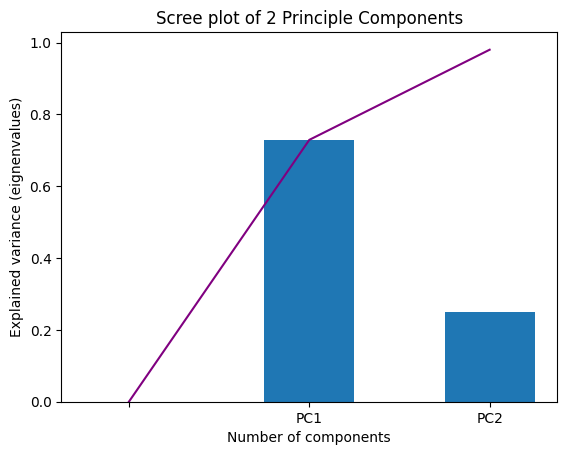

In [129]:
# Plotting
plt.bar(df2["PC"], df2["Explained Variance"], width=.5)
plt.plot(df2["PC"], df2["Cumulative Variance"], c="purple")

plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot of 2 Principle Components')
 
plt.show()

In [165]:
# Make dataframe for PC
PCA_df = pd.DataFrame(list(map(np.ravel,PCA_ar)))
PCA_df = PCA_df.rename(columns={0: "PC1", 1:"PC2"})
PCA_df['Target'] = Y
PCA_df.head()

,PC1,PC2,Target
0,2.457998,-0.043570,HU
1,2.430358,0.916497,HU
2,3.991954,0.689104,HU
3,0.776790,0.273472,HU
4,2.787623,-0.004731,HU


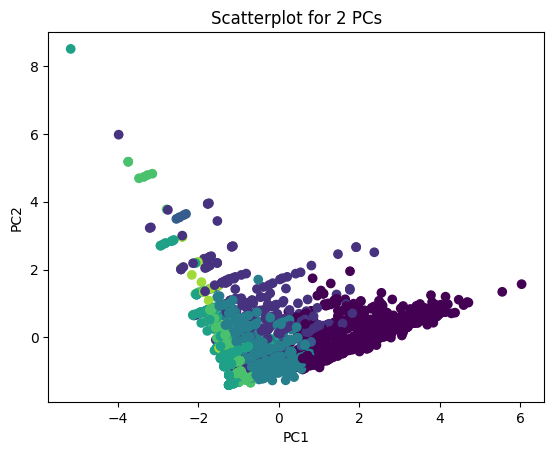

In [164]:
# Scatterplot for the PCs
plt.scatter(x=PCA_df["PC1"], y=PCA_df["PC2"], c=pd.factorize(PCA_df["Target"])[0])

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatterplot for 2 PCs')
 
plt.show()

#### Now doing it for PC of 3

In [137]:
# Making Y3 (result) and X3 (features)
Y3 = data.iloc[:,1].values
X3 = data[["Datetime", "Max_Wind", "Min_Pressure", "Radius_Max_Wind"]].values

Technically, datetime is not a valid feature to use in PCA as it is a category variable and not a quantative one. For instance, we can not say 20231024 is bigger than 18520826, since it was just a date. But I am using it in for the sake of having 3 principle components as I need 4 columns.

In [174]:
# Run pca process
from sklearn.decomposition import PCA

Scaler3 = StandardScaler()
# Normalized feature matrix 
Normalized_X3 = Scaler.fit_transform(X)
print("Normalied X matrix:", Normalized_X3)

PCA3 = PCA(n_components=3)
PCA_ar3 = PCA3.fit_transform(Normalized_X3)
print("The top 3 PCs:",  PCA_ar3)

Normalied X matrix: [[ 1.72503919 -1.40555287 -1.06005469]
 [ 1.72503919 -1.93150198 -0.21601855]
 [ 2.8332311  -2.69651887 -1.06005469]
 ...
 [-1.04544059  0.79387069  0.3466722 ]
 [-1.04544059  0.79387069  0.3466722 ]
 [-1.23013924  0.79387069  0.3466722 ]]
The top 3 PCs: [[ 2.4579979  -0.04357017 -0.17720885]
 [ 2.43035845  0.91649676  0.08071946]
 [ 3.99195385  0.68910354 -0.10756032]
 ...
 [-1.32795245 -0.21701744  0.18111884]
 [-1.32795245 -0.21701744  0.18111884]
 [-1.44860428 -0.25653041  0.31526597]]


In [185]:
# Explained variance in percentage
explained_variance3 = PCA3.explained_variance_ratio_
print("Explained variance ratio for the first 3 PCs are:", explained_variance3)
print("The first 3 PC accounts for:", (explained_variance3[0] + explained_variance3[1]+ explained_variance3[2]) *100, "percent of variance in the data")
print("The top 3 eigenvalues are:", PCA3.explained_variance_)

Explained variance ratio for the first 3 PCs are: [0.72852487 0.2506458  0.02082932]
The first 3 PC accounts for: 100.0 percent of variance in the data
The top 3 eigenvalues are: [2.1866269  0.75229943 0.06251806]


In [176]:
# Making data for plotting
explained_variance3 = [0] + explained_variance3.tolist()
cumulative_variance3 = np.cumsum(np.round(explained_variance3, decimals=3))

col3 = {"PC": ["", "PC1", "PC2", "PC3"], "Explained Variance": explained_variance3, "Cumulative Variance": cumulative_variance3.tolist()}
df3 = pd.DataFrame.from_dict(col3)
df3

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.728525,0.729
2,PC2,0.250646,0.980
3,PC3,0.020829,1.001


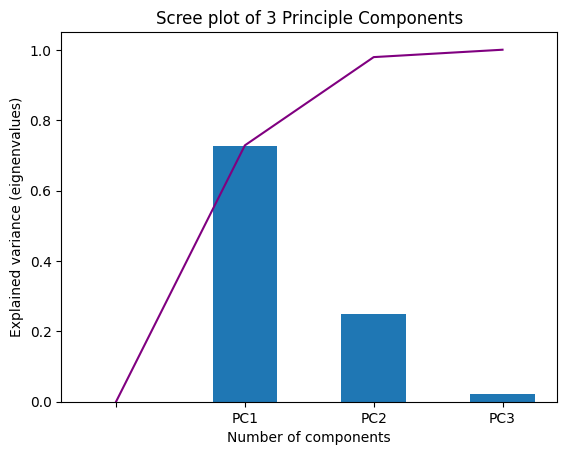

In [177]:
# Plotting
plt.bar(df3["PC"], df3["Explained Variance"], width=.5)
plt.plot(df3["PC"], df3["Cumulative Variance"], c="purple")

plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot of 3 Principle Components')
 
plt.show()

In [181]:
# Make dataframe for PC
PCA_df3 = pd.DataFrame(list(map(np.ravel,PCA_ar3)))
PCA_df3 = PCA_df3.rename(columns={0: "PC1", 1:"PC2", 2:"PC3"})
PCA_df3['Target'] = Y
PCA_df3.head()

,PC1,PC2,PC3,Target
0,2.457998,-0.043570,-0.177209,HU
1,2.430358,0.916497,0.080719,HU
2,3.991954,0.689104,-0.107560,HU
3,0.776790,0.273472,-0.070103,HU
4,2.787623,-0.004731,0.130695,HU


In [183]:
# 3d scatterplot 
import plotly.express as px

fig = px.scatter_3d(PCA_df3, x="PC1", y="PC2", z="PC3",
    color = "Target")

fig.show()